In [1]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:


#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.graphics.factorplots import interaction_plot

In [3]:
df = pd.read_csv("projectos_forvia.csv")
df.head(2)

,Number,Active,Project_Name,Project_Type,Geographical_scope,Project_manager,State,Percent_complete,Project_size,Project _organization,...,Closed,Domain,Domain Path,Last WAR,Project_Health,Project_type,Recurrent activity,Planned start date,Actual start date,On-hold
0,PRJ0075198,VERDADERO,TCO - FIS - ABRERA - VW210 IP,Shopfloor JIT/TCO,ABRERA FIS,BENAVENT Pablo,Work in progress,26.47,SMALL,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075304,Green,Regular,FALSO,01/02/2025 17:01,NaN,FALSO
1,PRJ0073962,VERDADERO,TCO - FCM - ALLENJOIE FHS - GEN2 New automated...,Shopfloor JIT/TCO,ALLENJOIE FCM,MAUVAIS Julien,Work in progress,52.17,LARGE,GIT/IT EMEA/MES & Digital Shopfloor projects,...,NaN,global,/,PRJSTAT0075248,Yellow,Regular,FALSO,18/01/2024 08:00,18/01/2024 08:00,VERDADERO


In [4]:
#Rellenamos nulos
df =df.fillna(method="bfill")
df =df.fillna(method="ffill")
df =df.fillna(method="bfill")


C:\Users\dorop\AppData\Local\Temp\ipykernel_10408\751567786.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna(method="bfill")
C:\Users\dorop\AppData\Local\Temp\ipykernel_10408\751567786.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna(method="ffill")
C:\Users\dorop\AppData\Local\Temp\ipykernel_10408\751567786.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna(method="bfill")


In [5]:

#Identificar valores nulos por columna
valores_nulos=df.isnull().sum()
valores_nulos

Number                     0
Active                     0
Project_Name               0
Project_Type               0
Geographical_scope         0
Project_manager            0
State                      0
Percent_complete           0
Project_size               0
Project _organization      0
Planned Go Live date       0
Project target phase       0
Actual Go Live date        0
Actual end date          246
BG                         0
Closed                     0
Domain                     0
Domain Path                0
Last WAR                   0
Project_Health             0
Project_type               0
Recurrent activity         0
Planned start date         0
Actual start date          0
On-hold                    0
dtype: int64

Variables dependientes a numericas 

In [6]:

df["Percent_complete"] = pd.to_numeric(df["Percent_complete"]).astype('float64')


In [7]:
size_map = {"SMALL": 1, "MEDIUM": 2, "LARGE": 3}
df["Project_size"] = df["Project_size"].map(size_map).astype('float64')



In [8]:
# Mapeo personalizado
health_map = {"Green": 3, "Yellow": 2}
df["Project_Health"] = df["Project_Health"].map(health_map).astype('float64')



In [9]:
# Mapeo completo de categorías en Project_Type
type_map = {
    "Shopfloor JIT/TCO": 1,
    "Shopfloor LES/NEO": 2,
    "FCS roll-outs": 3,
    "New software or release": 4,
    "Overall Project Coordination": 5,
    "Studies / Moves / Solution Selection / Other": 6,
    "New Site infrastructure": 7,
    "New infrastructure": 8,
    "ITAC": 9
}

# Aplicar mapeo y convertir a float64
df["Project_Type"] = df["Project_Type"].map(type_map).astype('float64')

In [10]:
#Rellenamos nulos
df =df.fillna(method="bfill")
df =df.fillna(method="ffill")
df =df.fillna(method="bfill")

C:\Users\dorop\AppData\Local\Temp\ipykernel_10408\4154069975.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna(method="bfill")
C:\Users\dorop\AppData\Local\Temp\ipykernel_10408\4154069975.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna(method="ffill")
C:\Users\dorop\AppData\Local\Temp\ipykernel_10408\4154069975.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df =df.fillna(method="bfill")


In [11]:

#Identificar valores nulos por columna
valores_nulos=df.isnull().sum()
valores_nulos

Number                     0
Active                     0
Project_Name               0
Project_Type               0
Geographical_scope         0
Project_manager            0
State                      0
Percent_complete           0
Project_size               0
Project _organization      0
Planned Go Live date       0
Project target phase       0
Actual Go Live date        0
Actual end date          246
BG                         0
Closed                     0
Domain                     0
Domain Path                0
Last WAR                   0
Project_Health             0
Project_type               0
Recurrent activity         0
Planned start date         0
Actual start date          0
On-hold                    0
dtype: int64

***Percent complete***

In [12]:
df["Percent_complete"] = pd.to_numeric(df["Percent_complete"], errors="coerce")
df["State"] = df["State"].astype("category")

C:\Users\dorop\AppData\Local\Temp\ipykernel_10408\2362582304.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="State", y="Percent_complete", ci=95)


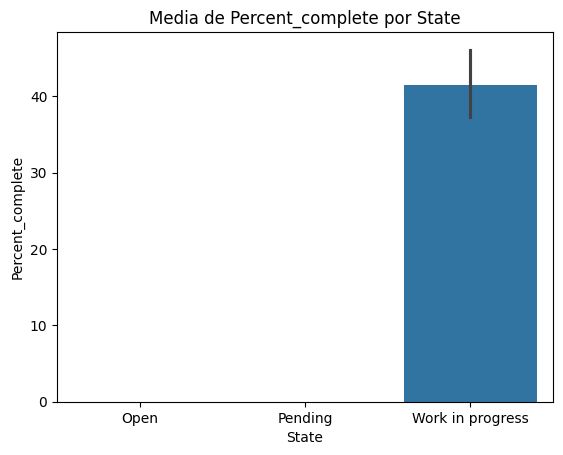

In [13]:
# Gráfico de barras con barras de error (por defecto muestra el IC al 95%)
sns.barplot(data=df, x="State", y="Percent_complete", ci=95)
plt.title("Media de Percent_complete por State")
plt.ylabel("Percent_complete")
plt.xlabel("State")
plt.show()

In [14]:
#Obtengo las categorías de la variable (Percent complete)
grupos=pd.unique(df['State'].values)
grupos

['Work in progress', 'Pending', 'Open']
Categories (3, object): ['Open', 'Pending', 'Work in progress']

In [15]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
mod = ols('Q("Percent_complete") ~ C(State)', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

             df         sum_sq       mean_sq         F    PR(>F)
C(State)    2.0   21169.600944  10584.800472  9.043084  0.000163
Residual  243.0  284428.034508   1170.485739       NaN       NaN


PR <0.05   F>1

In [16]:
df["Percent_complete"] = pd.to_numeric(df["Percent_complete"], errors="coerce")
df["State"] = df["State"].astype("category")
df["Project_Type"] = df["Project_Type"].astype("category")

In [17]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
# Se puede generar un analisis MANOVA (Múltiples variables categóricas)
mod= ols('Percent_complete ~  State + Project_Type + State:Project_Type', data=df).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

                       df         sum_sq       mean_sq         F    PR(>F)
State                 2.0   21169.600944  10584.800472  9.205715  0.000142
Project_Type          8.0   16495.254972   2061.906872  1.793263  0.079208
State:Project_Type   16.0   17727.430044   1107.964378  0.963609  0.497551
Residual            233.0  267905.152206   1149.807520       NaN       NaN


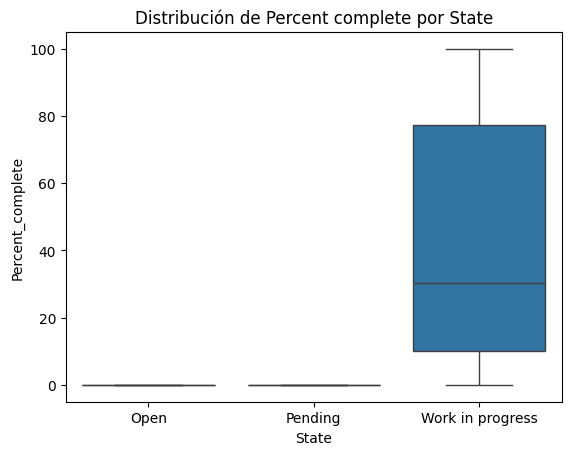

In [18]:
#Grafica variable Percent Complete vs State
sns.boxplot(data=df, x='State', y='Percent_complete')
plt.title("Distribución de Percent complete por State")
plt.show()

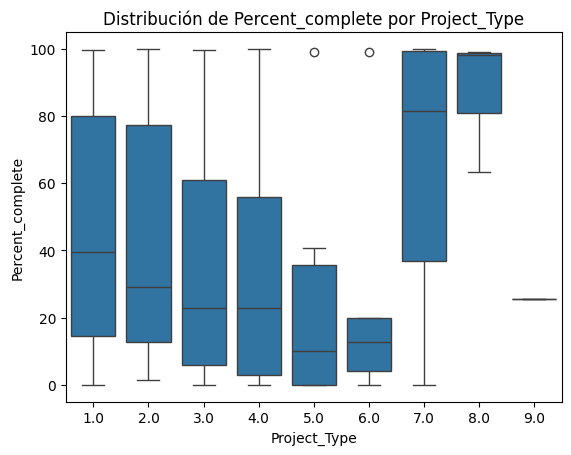

In [19]:
sns.boxplot(data=df, x='Project_Type', y='Percent_complete')
plt.title("Distribución de Percent_complete por Project_Type")
plt.show()

In [50]:
# Mapeo completo de categorías en Project_Type
type_map = {
    1:"Shopfloor JIT/TCO",
    2:"Shopfloor LES/NEO",
    3:"FCS roll-outs",
    4:"New software or release",
   5: "Overall Project Coordination",
   6: "Studies / Moves / Solution Selection / Other",
   7: "New Site infrastructure",
    8:"New infrastructure",
    9:"ITAC"
}

# Aplicar mapeo y convertir a float64
df["Project_Type"] = df["Project_Type"].map(type_map).astype('string')

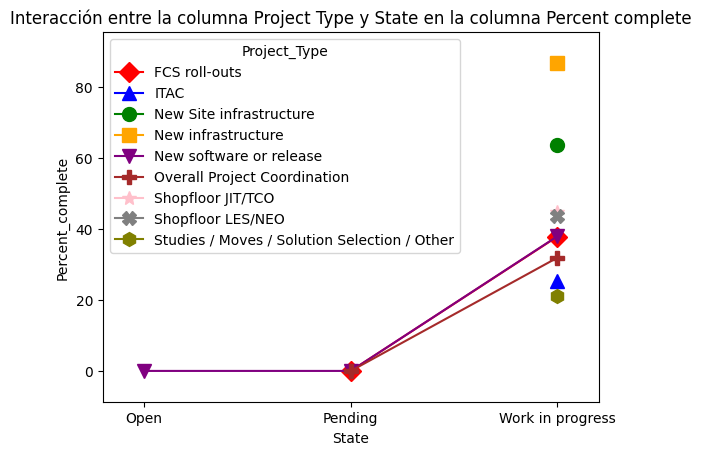

In [ ]:
# ...existing code...
df["State"] = df["State"].astype(str)
df["Project_Type"] = df["Project_Type"].astype(str)
df["Percent_complete"] = pd.to_numeric(df["Percent_complete"], errors="coerce")

# Ajusta marcadores y colores según el número de categorías
n_cats = df["Project_Type"].nunique()
base_markers = ['D', '^', 'o', 's', 'v', 'P', '*', 'X', 'h', '+']
base_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Si hay más categorías que marcadores, repite los marcadores
if n_cats > len(base_markers):
    markers = (base_markers * ((n_cats // len(base_markers)) + 1))[:n_cats]
    colors = (base_colors * ((n_cats // len(base_colors)) + 1))[:n_cats]
else:
    markers = base_markers[:n_cats]
    colors = base_colors[:n_cats]

fig = interaction_plot(df['State'], df['Project_Type'], df['Percent_complete'],
                       colors=colors, markers=markers, ms=10)
plt.title("Interacción entre la columna Project Type y State en la columna Percent complete")
plt.xlabel("State")
plt.ylabel("Percent_complete")
plt.show()
# ...existing code.

In [ ]:
# Mapeo completo de categorías en Project_Type
type_map = {
    "Shopfloor JIT/TCO": 1,
    "Shopfloor LES/NEO": 2,
    "FCS roll-outs": 3,
    "New software or release": 4,
    "Overall Project Coordination": 5,
    "Studies / Moves / Solution Selection / Other": 6,
    "New Site infrastructure": 7,
    "New infrastructure": 8,
    "ITAC": 9
}

# Aplicar mapeo y convertir a float64
df["Project_Type"] = df["Project_Type"].map(type_map).astype('float64')

***Project size***

In [21]:
df["Project_size"] = pd.to_numeric(df["Project_size"], errors="coerce")
df["BG"] = df["BG"].astype("category")

C:\Users\dorop\AppData\Local\Temp\ipykernel_10408\596661508.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="BG", y="Project_size", ci=95)


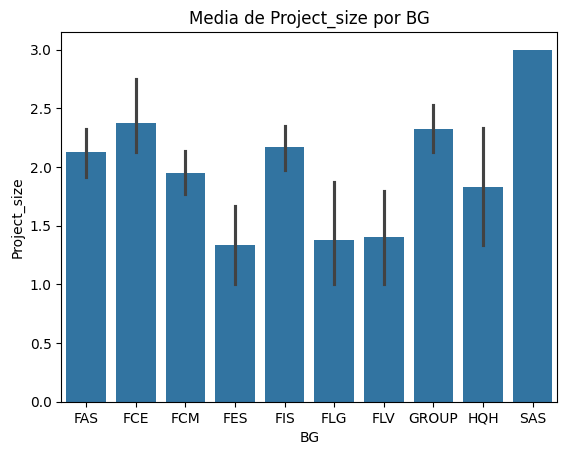

In [22]:
# Gráfico de barras con barras de error (por defecto muestra el IC al 95%)
sns.barplot(data=df, x="BG", y="Project_size", ci=95)
plt.title("Media de Project_size por BG")
plt.ylabel("Project_size")
plt.xlabel("BG")
plt.show()

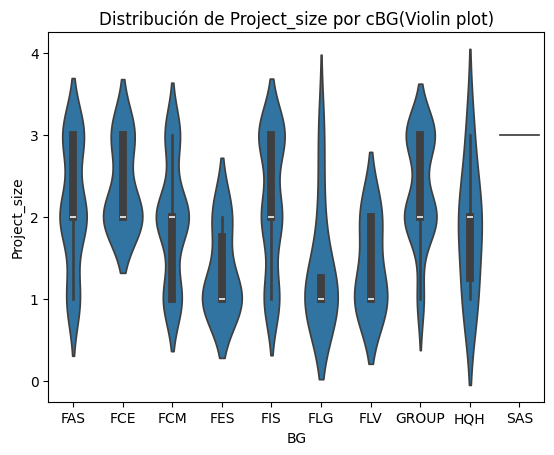

In [23]:
# Gráfico de violín
sns.violinplot(data=df, x="BG", y="Project_size", inner="box")
plt.title("Distribución de Project_size por cBG(Violin plot)")
plt.ylabel("Project_size")
plt.xlabel("BG")
plt.show()

In [24]:
#Obtengo las categorías de la variable (Percent complete)
grupos=pd.unique(df['BG'].values)
grupos

['FIS', 'FCM', 'GROUP', 'FAS', 'FCE', 'FES', 'HQH', 'FLV', 'FLG', 'SAS']
Categories (10, object): ['FAS', 'FCE', 'FCM', 'FES', ..., 'FLV', 'GROUP', 'HQH', 'SAS']

In [25]:
mod = ols('Q("Project_size") ~ C(BG)', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

             df      sum_sq   mean_sq         F   PR(>F)
C(BG)       9.0   15.668314  1.740924  3.264296  0.00092
Residual  236.0  125.864207  0.533323       NaN      NaN


In [26]:
df["Project:size"] = pd.to_numeric(df["Project_size"], errors="coerce")
df["BG"] = df["BG"].astype("category")
df["State"] = df["State"].astype("category")

In [27]:
mod = ols('Project_size ~ C(BG) + C(State) + C(BG):C(State)', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                   df      sum_sq   mean_sq         F    PR(>F)
C(BG)             9.0   15.668314  1.740924  3.235334  0.001023
C(State)          2.0    1.279805  0.639903  1.189196  0.306347
C(BG):C(State)   18.0   10.578605  0.587700  1.092183  0.361074
Residual        228.0  122.686132  0.538097       NaN       NaN


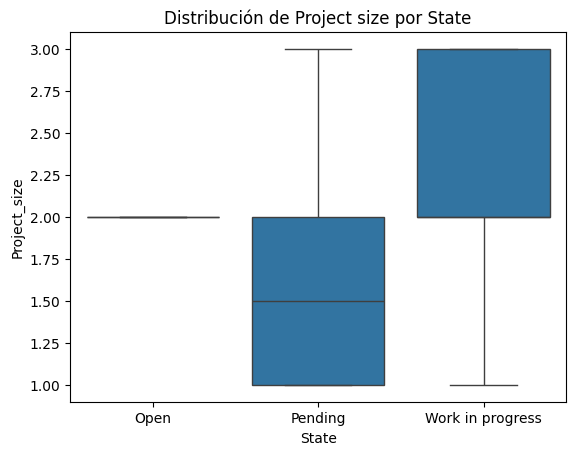

In [28]:
#Grafica variable Percent Complete vs State
sns.boxplot(data=df, x='State', y='Project_size')
plt.title("Distribución de Project size por State")
plt.show()

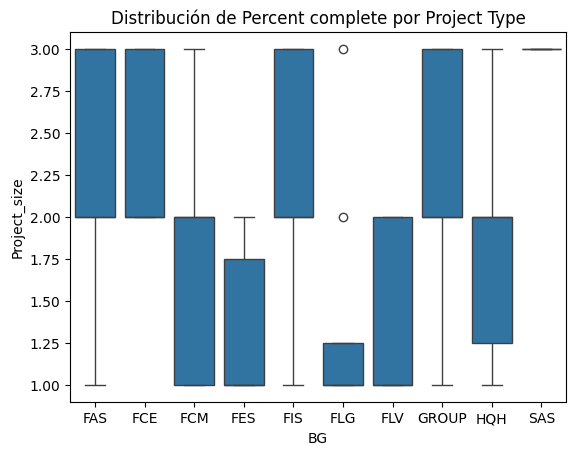

In [29]:
sns.boxplot(data=df, x='BG', y='Project_size')
plt.title("Distribución de Percent complete por Project Type")
plt.show()

In [30]:
markers = ['D', '^', 'o']
colors = ['red', 'blue', 'green']

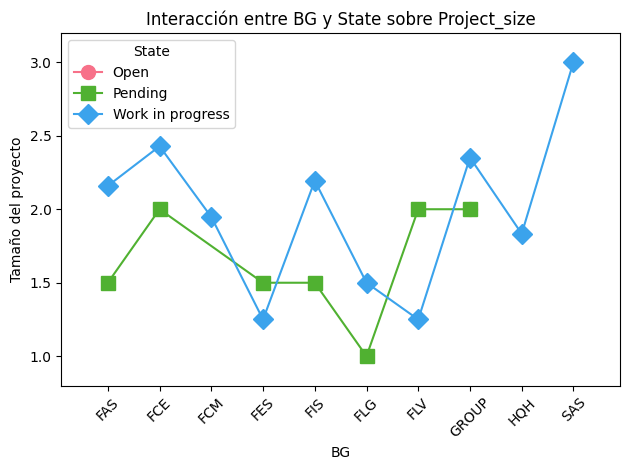

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot

# Asegúrate de que las variables categóricas estén en formato string
x = df['BG'].astype(str)
trace = df['State'].astype(str)
response = df['Project_size']

# Determinar niveles únicos en 'State' para asignar colores y marcadores
n_trace = trace.nunique()
palette = sns.color_palette("husl", n_trace)
marker_list = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'X'][:n_trace]

# Crear gráfico de interacción
fig = interaction_plot(x, trace, response,
                       colors=palette,
                       markers=marker_list,
                       ms=10)

plt.title("Interacción entre BG y State sobre Project_size")
plt.xlabel("BG")
plt.ylabel("Tamaño del proyecto")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Project Health***

In [32]:
df["Project_Health"] = pd.to_numeric(df["Project_Health"], errors="coerce")
df["State"] = df["State"].astype("category")

C:\Users\dorop\AppData\Local\Temp\ipykernel_10408\2213322835.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="State", y="Project_Health", ci=95)


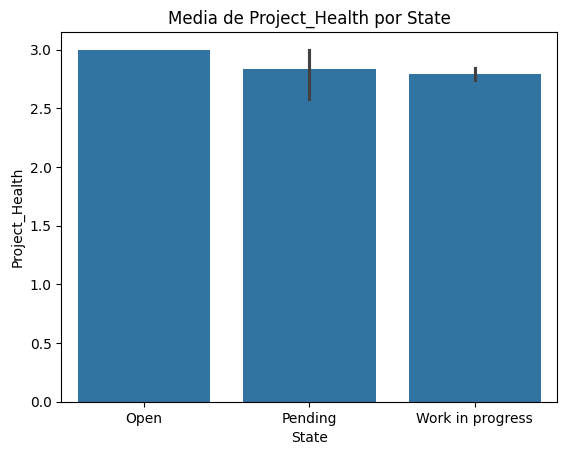

In [33]:
# Gráfico de barras con barras de error (por defecto muestra el IC al 95%)
sns.barplot(data=df, x="State", y="Project_Health", ci=95)
plt.title("Media de Project_Health por State")
plt.ylabel("Project_Health")
plt.xlabel("State")
plt.show()

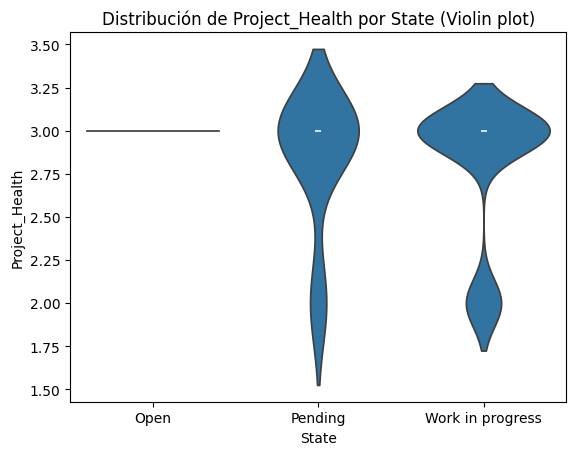

In [34]:
# Gráfico de violín
sns.violinplot(data=df, x="State", y="Project_Health", inner="box")
plt.title("Distribución de Project_Health por State (Violin plot)")
plt.ylabel("Project_Health")
plt.xlabel("State")
plt.show()

In [35]:
#Obtengo las categorías de la variable (Percent complete)
grupos=pd.unique(df['State'].values)
grupos

['Work in progress', 'Pending', 'Open']
Categories (3, object): ['Open', 'Pending', 'Work in progress']

In [36]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
modelo = ols('Q("Project_Health") ~ C(Q("State"))', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                   df      sum_sq   mean_sq         F    PR(>F)
C(BG)             9.0   15.668314  1.740924  3.235334  0.001023
C(State)          2.0    1.279805  0.639903  1.189196  0.306347
C(BG):C(State)   18.0   10.578605  0.587700  1.092183  0.361074
Residual        228.0  122.686132  0.538097       NaN       NaN


In [37]:
df["Project_Health"] = pd.to_numeric(df["Project_Health"], errors="coerce")
df["State"] = df["State"].astype("category")
df["On-hold"] = df["On-hold"].astype("category")

In [38]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
# Se puede generar un analisis MANOVA (Múltiples variables categóricas)
mod = ols('Q("Project_Health") ~ Q("State") + Q("On-hold") + Q("State"):Q("On-hold")', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)


                            df     sum_sq   mean_sq          F    PR(>F)
Q("State")                 2.0   0.064884  0.032442   0.203697  0.815849
Q("On-hold")               1.0   1.654425  1.654425  10.387898  0.001444
Q("State"):Q("On-hold")    2.0   0.328246  0.164123   1.030504  0.358394
Residual                 241.0  38.382791  0.159265        NaN       NaN


C:\Users\dorop\AppData\Local\Temp\ipykernel_10408\2213322835.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="State", y="Project_Health", ci=95)


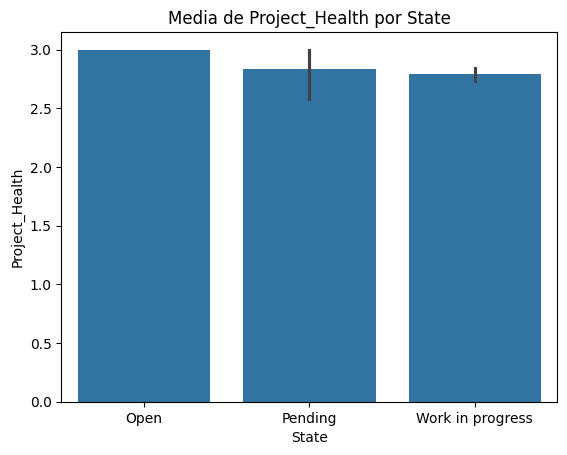

In [39]:
# Gráfico de barras con barras de error (por defecto muestra el IC al 95%)
sns.barplot(data=df, x="State", y="Project_Health", ci=95)
plt.title("Media de Project_Health por State")
plt.ylabel("Project_Health")
plt.xlabel("State")
plt.show()

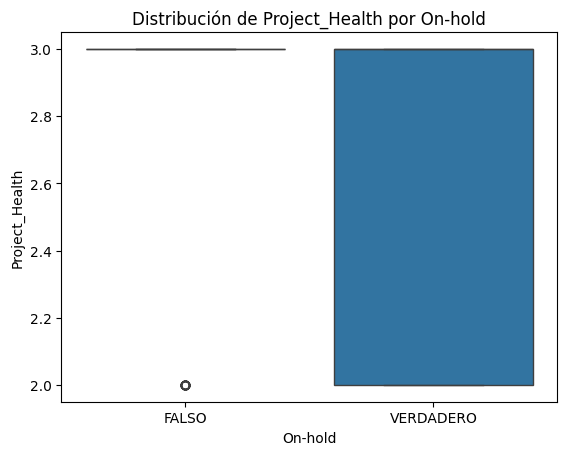

In [40]:
sns.boxplot(data=df, x='On-hold', y='Project_Health')
plt.title("Distribución de Project_Health por On-hold")
plt.show()

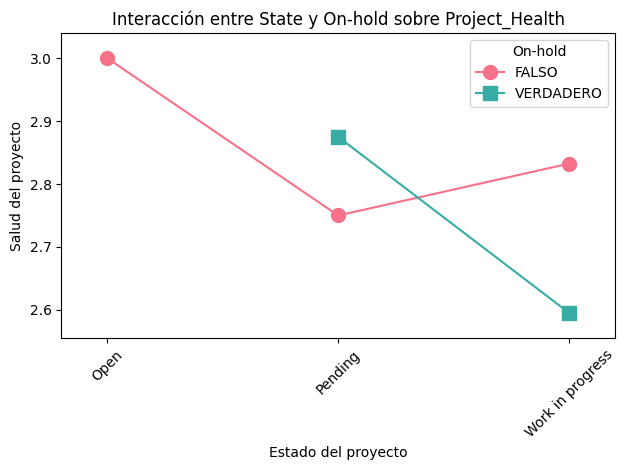

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot

# Convertir variables categóricas a string
x = df['State'].astype(str)
trace = df['On-hold'].astype(str)
response = df['Project_Health']

# Determinar niveles únicos en 'trace' para asignar colores y marcadores
n_trace = trace.nunique()
palette = sns.color_palette("husl", n_trace)
marker_list = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'X'][:n_trace]

# Crear gráfico de interacción
fig = interaction_plot(x, trace, response,
                       colors=palette,
                       markers=marker_list,
                       ms=10)

plt.title("Interacción entre State y On-hold sobre Project_Health")
plt.xlabel("Estado del proyecto")
plt.ylabel("Salud del proyecto")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Project Type***

In [42]:
df["Project_Type"] = pd.to_numeric(df["Project_Type"], errors="coerce")
df["Project_size"] = df["Project_size"].astype("category")

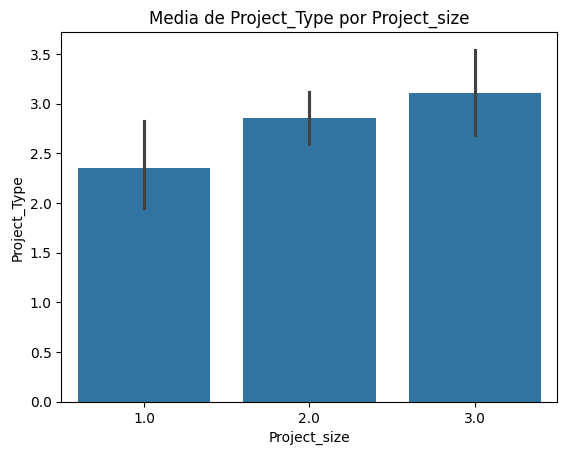

In [43]:
# Gráfico de barras con barras de error (por defecto muestra el IC al 95%)
sns.barplot(data=df, x="Project_size", y="Project_Type",errorbar=('ci', 95) )
plt.title("Media de Project_Type por Project_size")
plt.ylabel("Project_Type")
plt.xlabel("Project_size")
plt.show()

In [44]:
# Ajustar el modelo ANOVA
modelo = ols('Q("Project_Type") ~ C(Q("Project_size"))', data=df).fit()

# Generar tabla ANOVA tipo I
anova_table = sm.stats.anova_lm(modelo, typ=1)
print(anova_table)

                         df      sum_sq    mean_sq         F  PR(>F)
C(Q("Project_size"))    2.0   20.389292  10.194646  3.533904  0.0307
Residual              243.0  701.009082   2.884811       NaN     NaN


In [45]:
df["Project_Type"] = pd.to_numeric(df["Project_Type"], errors="coerce")
df["Project_size"] = df["Project_size"].astype("category")
df["State"] = df["State"].astype("category")

In [46]:
#p-value < 0.05, se rechaza la hipótesis de que todas las medias son iguales
# Se puede generar un analisis MANOVA (Múltiples variables categóricas)
mod = ols('Q("Project_Type") ~ Q("Project_size") + Q("State") + Q("Project_size"):Q("State")', data=df).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                                 df      sum_sq    mean_sq         F    PR(>F)
Q("Project_size")               2.0   20.389292  10.194646  3.553180  0.030156
Q("State")                      2.0   13.264859   6.632429  2.311627  0.101312
Q("Project_size"):Q("State")    4.0    5.128709   1.282177  0.446882  0.774621
Residual                      239.0  685.729437   2.869161       NaN       NaN


C:\Users\dorop\AppData\Local\Temp\ipykernel_10408\3260679169.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df, x="Project_size", y="Project_Type", ci=95)


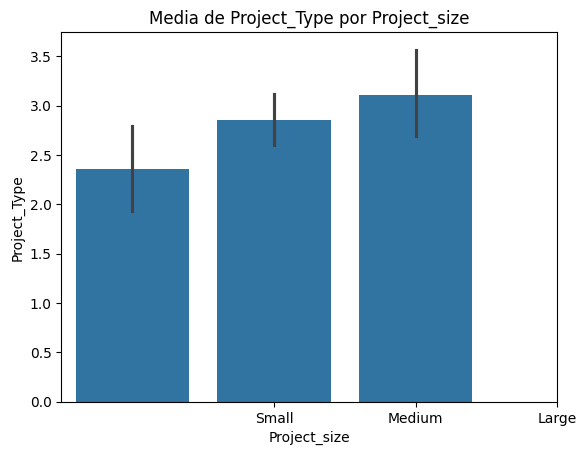

In [47]:
# Gráfico de barras con barras de error (por defecto muestra el IC al 95%)
sns.barplot(data=df, x="Project_size", y="Project_Type", ci=95)

ticks = [1.0, 2.0, 3.0]
labels = ['Small', 'Medium', 'Large']
plt.xticks(ticks=ticks, labels=labels, ha='center')


plt.title("Media de Project_Type por Project_size")
plt.ylabel("Project_Type")
plt.xlabel("Project_size")
plt.show()

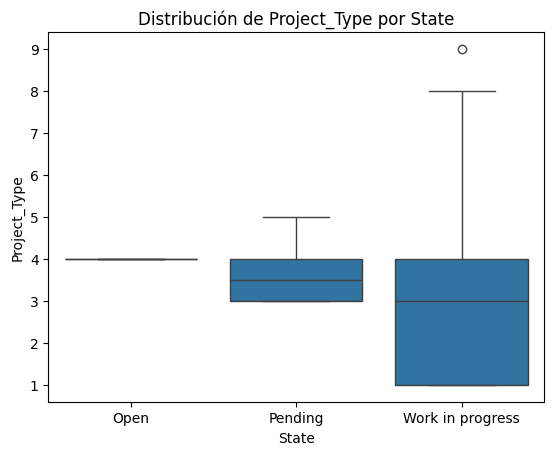

In [48]:
sns.boxplot(data=df, x='State', y='Project_Type')
plt.title("Distribución de Project_Type por State")
plt.show()

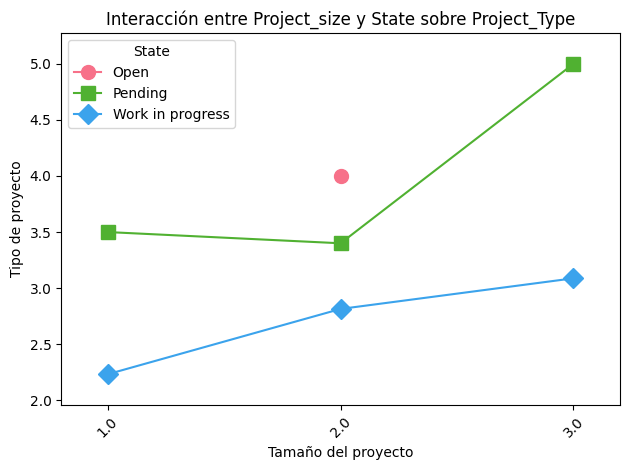

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot

# Convertir variables categóricas a string
x = df['Project_size'].astype(str)
trace = df['State'].astype(str)
response = df['Project_Type']

# Determinar niveles únicos en 'State'
n_trace = trace.nunique()

# Crear paleta de colores y lista de marcadores suficientes
palette = sns.color_palette("husl", n_trace)
marker_list = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'X'][:n_trace]

# Crear gráfico de interacción
fig = interaction_plot(x, trace, response,
                       colors=palette,
                       markers=marker_list,
                       ms=10)

plt.title("Interacción entre Project_size y State sobre Project_Type")
plt.xlabel("Tamaño del proyecto")
plt.ylabel("Tipo de proyecto")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()